In [42]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
affiliations_df = pd.read_csv("../data/Affiliation_mortality.csv")
characters_df = pd.read_csv("../data/game_of_thrones_characters_cleaned.csv")


In [71]:
characters_df

,Name,Born,Died,House(s),Affiliation(s),Title(s),Culture,Father,Mother,Sibling(s),...,Spouse(s),Religion,Issue,Also known as,Personal arms,Species,Affiliation,Lover(s),Family,Dead
0,Aemon,"Aemon Targaryen 202 AC Red Keep , King's Landing","302 AC (aged 100) Castle Black , the Gift",Targaryen (renounced),"[Order of Maesters, Night's Watch]",Prince (formerly) Maester,Valyrian,{ Maekar I Targaryen },{ Dyanna Dayne },{ Daeron Targaryen } { Aerion Targaryen } { Ae...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Aggar,NaN,"299 AC Winterfell , the North",NaN,[Greyjoy],NaN,Ironborn,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Aggo (The North Remembers),NaN,NaN,NaN,"[Drogo, Targaryen]",Bloodrider,Dothraki,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Aggo (The Red Woman),NaN,"303 AC Vaes Dothrak , Dothraki Sea",NaN,[Moro],NaN,Dothraki,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Alanna,NaN,"305 AC King's Landing , the Crownlands",NaN,[Unknown],NaN,NaN,NaN,NaN,NaN,...,Husband,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Ygritte,Beyond the Wall,"301 AC Castle Black , the Wall",NaN,[Mance Rayder],NaN,Free Folk,NaN,NaN,NaN,...,NaN,Old Gods,NaN,NaN,NaN,NaN,NaN,Jon Snow,NaN,1
590,Yoren,NaN,"299 AC Near Harrenhal , the Riverlands",NaN,[Night's Watch],NaN,Westerosi,NaN,NaN,{Brother},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
591,Yunkai%27i whore,NaN,NaN,NaN,[Wise Masters],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
592,Zalla,298 AC in Meereen,301 AC (aged 3) in Meereen Burned alive by Drogon,NaN,[Unknown],NaN,Ghiscari ( Meereenese ),Goatherd,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


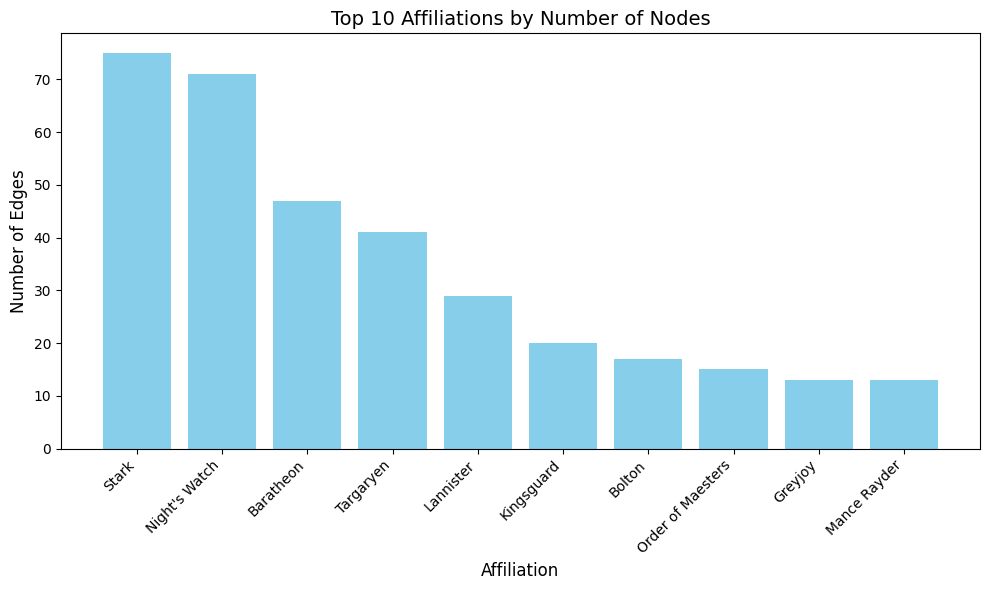

In [79]:
# Sort the affiliations by 'Total' in descending order and select the top 10
top_affiliations = affiliations_df.sort_values(by="Total", ascending=False)[1:11]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_affiliations["Affiliation(s)"], top_affiliations["Total"], color="skyblue")
plt.xlabel("Affiliation", fontsize=12)
plt.ylabel("Number of Edges", fontsize=12)
plt.title("Top 10 Affiliations by Number of Nodes", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [2]:
G = nx.read_graphml("../data/got_network.graphml")

In [75]:
# Analyze the corrected network
num_nodes_corrected = G.number_of_nodes()
num_edges_corrected = G.number_of_edges()
degree_distribution_corrected = [deg for _, deg in G.degree()]
node_attributes_corrected = {node: G.degree(node) for node in G.nodes()}

# Summarizing corrected network properties
network_summary = {
    "Number of Nodes": num_nodes_corrected,
    "Number of Edges": num_edges_corrected,
    "Degree Distribution": degree_distribution_corrected,
    "Node Attributes (Degree)": node_attributes_corrected
}

In [81]:
num_nodes_corrected

594

In [82]:
num_edges_corrected

21005

In [76]:
# print avarage node degree
print(f"Average node degree: {np.mean(degree_distribution_corrected)}")


Average node degree: 70.72390572390573


In [24]:
# Fix the DataFrame by converting string representations of lists into actual lists of strings
import ast

def fix_affiliations(entry):
    """
    Converts a string representation of a list into an actual list of strings.
    """
    if isinstance(entry, str):
        try:
            # Safely evaluate the string as a Python literal
            return ast.literal_eval(entry)
        except (ValueError, SyntaxError):
            return []  # Return an empty list if the conversion fails
    return entry  # Return the entry unchanged if it's already a list

# Apply the fix to the 'Affiliation(s)' column
characters_df['Affiliation(s)'] = characters_df['Affiliation(s)'].apply(fix_affiliations)



In [43]:
affiliations_df.iloc[0:30]

,Affiliation(s),Alive,Dead,Total
0,Unknown,75,83,158
1,Night's Watch,31,40,71
2,Stark,36,39,75
3,Baratheon,17,30,47
4,Targaryen,15,26,41
5,Kingsguard,4,16,20
6,Lannister,16,13,29
7,Bolton,4,13,17
8,White Walkers,0,12,12
9,Greyjoy,3,10,13


In [55]:
# Find characters affiliated with "Night's Watch" and "Stark"
target_affiliations = {"Order of Maesters", "Small Council"}    
# Assign colors to nodes based on their affiliations
affiliation_colors = {"Order of Maesters": "blue", "Small Council": "red"}

# Identify characters with at least one target affiliation
target_characters = characters_df[
    characters_df["Affiliation(s)"].apply(lambda affs: bool(set(affs).intersection(target_affiliations)))
]["Name"].tolist()

# Create a subgraph of these characters and their relationships
subgraph = nx.Graph()

# Add nodes for target characters
subgraph.add_nodes_from(target_characters)

# Add edges between target characters based only on their shared affiliations with "Night's Watch" or "Stark"
for i, row in characters_df.iterrows():
    character = row["Name"]
    affiliations = row["Affiliation(s)"]

    if character in target_characters:
        for j, other_row in characters_df.iterrows():
            other_character = other_row["Name"]
            other_affiliations = other_row["Affiliation(s)"]

            # Only add edges if both characters are in the target list and share one of the target affiliations
            if (
                character != other_character
                and other_character in target_characters
                and bool(set(affiliations).intersection(target_affiliations).intersection(other_affiliations))
            ):
                subgraph.add_edge(character, other_character)

# Analyze the subgraph
num_nodes_subgraph = subgraph.number_of_nodes()
num_edges_subgraph = subgraph.number_of_edges()

# Output summary of subgraph
{
    "Number of Nodes": num_nodes_subgraph,
    "Number of Edges": num_edges_subgraph,
    "Nodes in Subgraph": list(subgraph.nodes)
}

node_colors = []

for node in subgraph.nodes:
    affiliations = characters_df[characters_df["Name"] == node]["Affiliation(s)"].iloc[0]
    # Check which affiliation applies and pick the first matching color
    for aff, color in affiliation_colors.items():
        if aff in affiliations:
            node_colors.append(color)
            break

# Plot the subgraph with a legend
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph)  # Layout for better visualization

# Draw nodes and edges
nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color=node_colors)
nx.draw_networkx_edges(subgraph, pos, width=2, edge_color="gray")
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color="black")

# Create a legend for affiliations
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
                 for color in affiliation_colors.values()]
plt.legend(legend_labels, affiliation_colors.keys(), loc="upper left", title="Affiliations")

# Add title and display the graph
plt.title("Subgraph of Characters Affiliated with 'Greyjoy' and 'Bolton'")
plt.axis("off")
plt.show()


{'Number of Nodes': 25,
 'Number of Edges': 170,
 'Nodes in Subgraph': ['Aemon',
  'Archmaester (Eastwatch)',
  'Renly Baratheon',
  'Stannis Baratheon',
  'Bronn',
  'Caleotte',
  'Citadel maester',
  'Cressen',
  'Ebrose',
  'Helliweg',
  'Cersei Lannister',
  'Jaime Lannister',
  'Tyrion Lannister',
  'Tywin Lannister',
  'Luwin',
  'Oberyn Martell',
  'Pycelle',
  'Qyburn',
  'Sandhu',
  'Davos Seaworth',
  'Eddard Stark',
  'Samwell Tarly',
  'Varys',
  'Weyland',
  'Wolkan']}

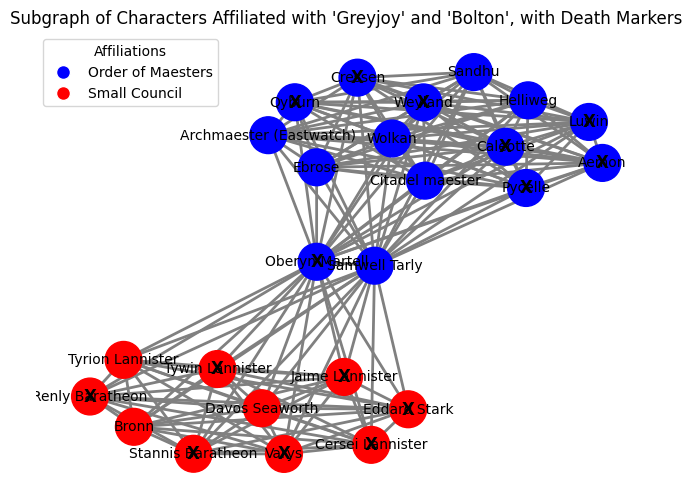

In [67]:
# Update the visualization to mark dead characters with a special symbol

# Add an attribute to identify dead characters (mock data, replace with actual death data if available)
# For demonstration, assume some characters are dead
dead_characters = list(characters_df[characters_df['Died'].notna()].Name)

# Prepare dead markers
dead_markers = {node: "X" if node in dead_characters else "" for node in subgraph.nodes}

# Plot the subgraph with a legend and dead markers
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph)  # Layout for better visualization

# Draw nodes and edges
nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color=node_colors)
nx.draw_networkx_edges(subgraph, pos, width=2, edge_color="gray")
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color="black")

# Add dead markers inside the nodes
for node, (x, y) in pos.items():
    if dead_markers[node]:  # If the character is dead, add a marker
        plt.text(x, y, dead_markers[node], fontsize=12, color="black", fontweight="bold", ha="center", va="center")

# Create a legend for affiliations
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
                 for color in affiliation_colors.values()]
plt.legend(legend_labels, affiliation_colors.keys(), loc="upper left", title="Affiliations")

# Add title and display the graph
plt.title("Characters Affiliated with 'Order of Maesters' and 'Small Council', with Death Markers")
plt.axis("off")
plt.show()
